In [2]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar dataset
df = pd.read_csv("../data/raw/2020_01_JAN.csv")

# 3. Vista inicial
print("Shape:", df.shape)
df.head()

Shape: (173076, 13)


,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,PRESS_INTK,TEMP_INTK,WellFailure
0,DEEPWATER-VVBMZ0,2020-01-01 00:00:00,4.480000,2659.0600,0.55,NaN,NaN,105.57000,0.00000,2.550000,1966.8,80.64,yes
1,DEEPWATER-VKCG0Y,2020-01-01 08:00:31,24.799999,4172.1997,54.00,460.50000,235.39999,279.09998,425.10001,0.200136,NaN,NaN,NaN
2,DEEPWATER-HOQZS1,2020-01-01 08:01:14,39.200001,4008.9998,59.00,354.20001,223.50000,280.19998,459.89999,NaN,NaN,NaN,NaN
3,DEEPWATER-IXZFOT,2020-01-01 08:01:54,20.900000,3996.2000,133.00,518.39996,243.50000,319.10001,304.00000,NaN,NaN,NaN,NaN
4,DEEPWATER-3PEB5I,2020-01-01 08:02:22,NaN,3742.3000,NaN,NaN,232.20000,276.39999,NaN,NaN,NaN,NaN,NaN


In [3]:
# ============================
# Valores faltantes
# ============================
print("Valores nulos por columna:")
print(df.isna().sum())

print("\nPorcentaje de nulos por columna:")
print((df.isna().mean() * 100).round(2).sort_values(ascending=False))

# ============================
# Balance de clases
# ============================
print("\nDistribución de WellFailure:")
print(df["WellFailure"].value_counts(dropna=False))

Valores nulos por columna:
WELL_ID             0
DATE                0
CURRENT         58352
PRESS_DESC      11763
FREQUENCY       38613
PRESS_INT       14762
TEMP_INT        21629
TEMP_MOT        12167
OUT_VOLT       100719
VIBRATION       53354
PRESS_INTK     173075
TEMP_INTK      173075
WellFailure    173065
dtype: int64

Porcentaje de nulos por columna:
TEMP_INTK      100.00
PRESS_INTK     100.00
WellFailure     99.99
OUT_VOLT        58.19
CURRENT         33.71
VIBRATION       30.83
FREQUENCY       22.31
TEMP_INT        12.50
PRESS_INT        8.53
TEMP_MOT         7.03
PRESS_DESC       6.80
DATE             0.00
WELL_ID          0.00
dtype: float64

Distribución de WellFailure:
WellFailure
NaN           173065
yes               10
Manual off         1
Name: count, dtype: int64


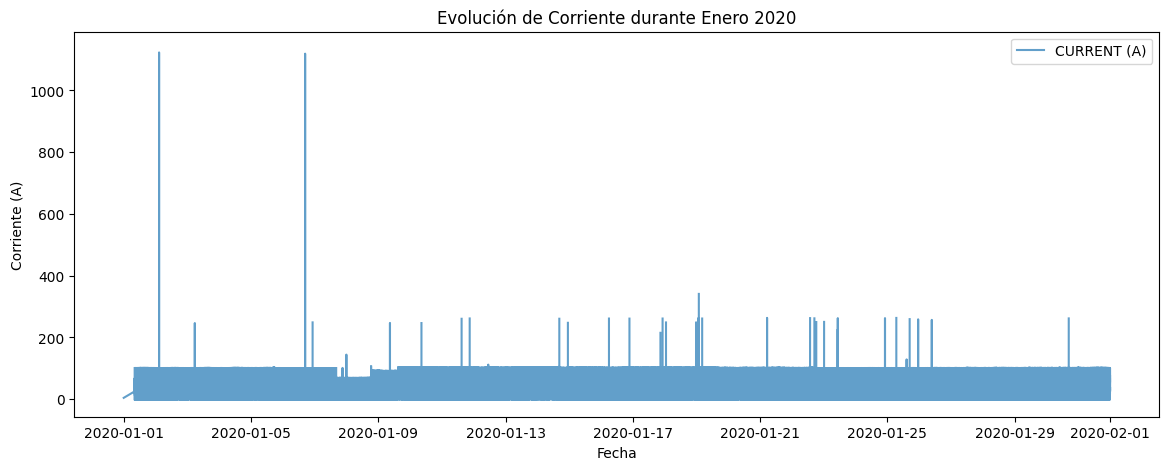

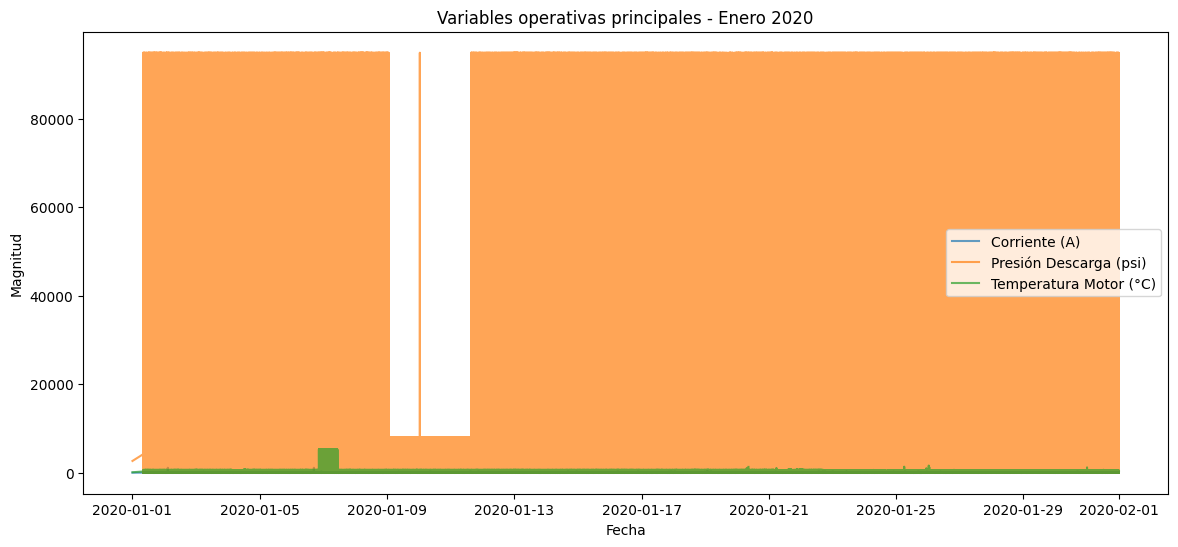

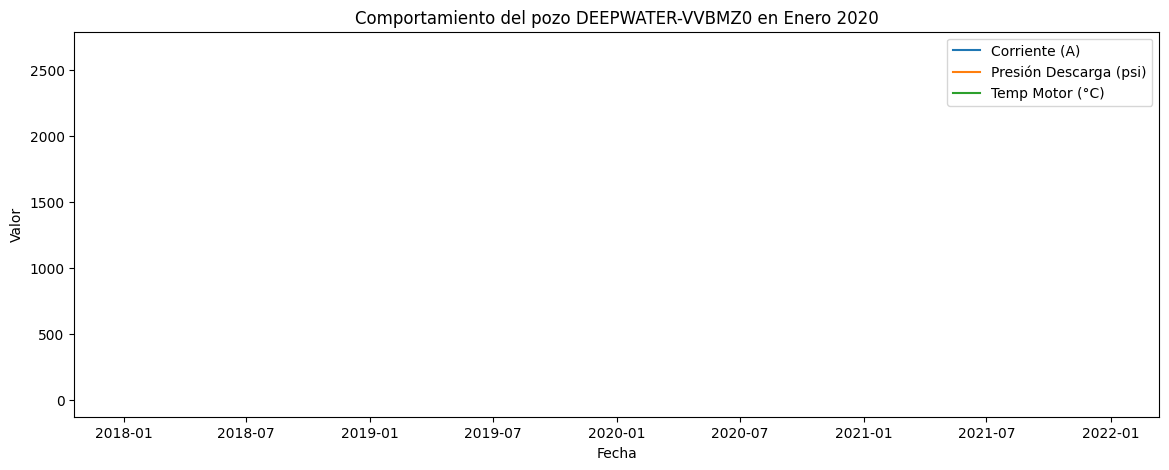

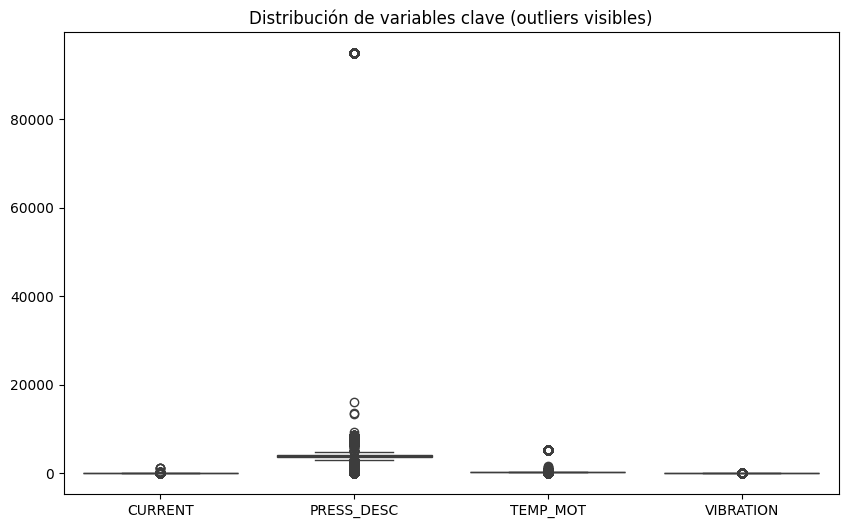

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que la columna DATE sea tipo datetime
df["DATE"] = pd.to_datetime(df["DATE"])

# Ordenar por tiempo
df = df.sort_values("DATE")

# ============================
# Serie de tiempo general (ejemplo: corriente)
# ============================
plt.figure(figsize=(14,5))
plt.plot(df["DATE"], df["CURRENT"], label="CURRENT (A)", alpha=0.7)
plt.xlabel("Fecha")
plt.ylabel("Corriente (A)")
plt.title("Evolución de Corriente durante Enero 2020")
plt.legend()
plt.show()

# ============================
# Múltiples sensores en una gráfica
# ============================
plt.figure(figsize=(14,6))
plt.plot(df["DATE"], df["CURRENT"], label="Corriente (A)", alpha=0.7)
plt.plot(df["DATE"], df["PRESS_DESC"], label="Presión Descarga (psi)", alpha=0.7)
plt.plot(df["DATE"], df["TEMP_MOT"], label="Temperatura Motor (°C)", alpha=0.7)
plt.xlabel("Fecha")
plt.ylabel("Magnitud")
plt.title("Variables operativas principales - Enero 2020")
plt.legend()
plt.show()

# ============================
# Analizar un pozo específico
# ============================
pozo = "DEEPWATER-VVBMZ0"
df_pozo = df[df["WELL_ID"] == pozo]

plt.figure(figsize=(14,5))
plt.plot(df_pozo["DATE"], df_pozo["CURRENT"], label="Corriente (A)")
plt.plot(df_pozo["DATE"], df_pozo["PRESS_DESC"], label="Presión Descarga (psi)")
plt.plot(df_pozo["DATE"], df_pozo["TEMP_MOT"], label="Temp Motor (°C)")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title(f"Comportamiento del pozo {pozo} en Enero 2020")
plt.legend()
plt.show()

# ============================
# Boxplot por variable para ver outliers
# ============================
plt.figure(figsize=(10,6))
sns.boxplot(data=df[["CURRENT", "PRESS_DESC", "TEMP_MOT", "VIBRATION"]])
plt.title("Distribución de variables clave (outliers visibles)")
plt.show()


In [5]:
df.tail(5)


,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,PRESS_INTK,TEMP_INTK,WellFailure
173071,DEEPWATER-BP2VWC,2020-01-31 23:57:15,21.000000,3916.1001,60.0,216.70000,235.0,267.39999,NaN,NaN,NaN,NaN,NaN
173072,DEEPWATER-DSU5DC,2020-01-31 23:58:00,NaN,3864.2000,NaN,413.39999,NaN,292.10001,NaN,NaN,NaN,NaN,NaN
173073,DEEPWATER-MH3PGB,2020-01-31 23:58:22,31.500000,NaN,174.0,NaN,NaN,NaN,401.00000,NaN,NaN,NaN,NaN
173074,DEEPWATER-BZZIEL,2020-01-31 23:58:33,36.400002,4006.8999,NaN,504.49997,232.7,287.39999,462.79999,0.200136,NaN,NaN,NaN
173075,DEEPWATER-DSU5DC,2020-01-31 23:59:00,NaN,3864.7000,NaN,413.59998,NaN,292.30002,NaN,NaN,NaN,NaN,NaN


In [6]:
# Filtrar la fila donde WellFailure = "Manual off"
manual_off_row = df[df["WellFailure"] == "Manual off"]
manual_off_row


,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,PRESS_INTK,TEMP_INTK,WellFailure
21078,DEEPWATER-3FD330,2020-01-05 00:05:31,NaN,3306.9998,NaN,967.89996,222.3,NaN,NaN,NaN,NaN,NaN,Manual off


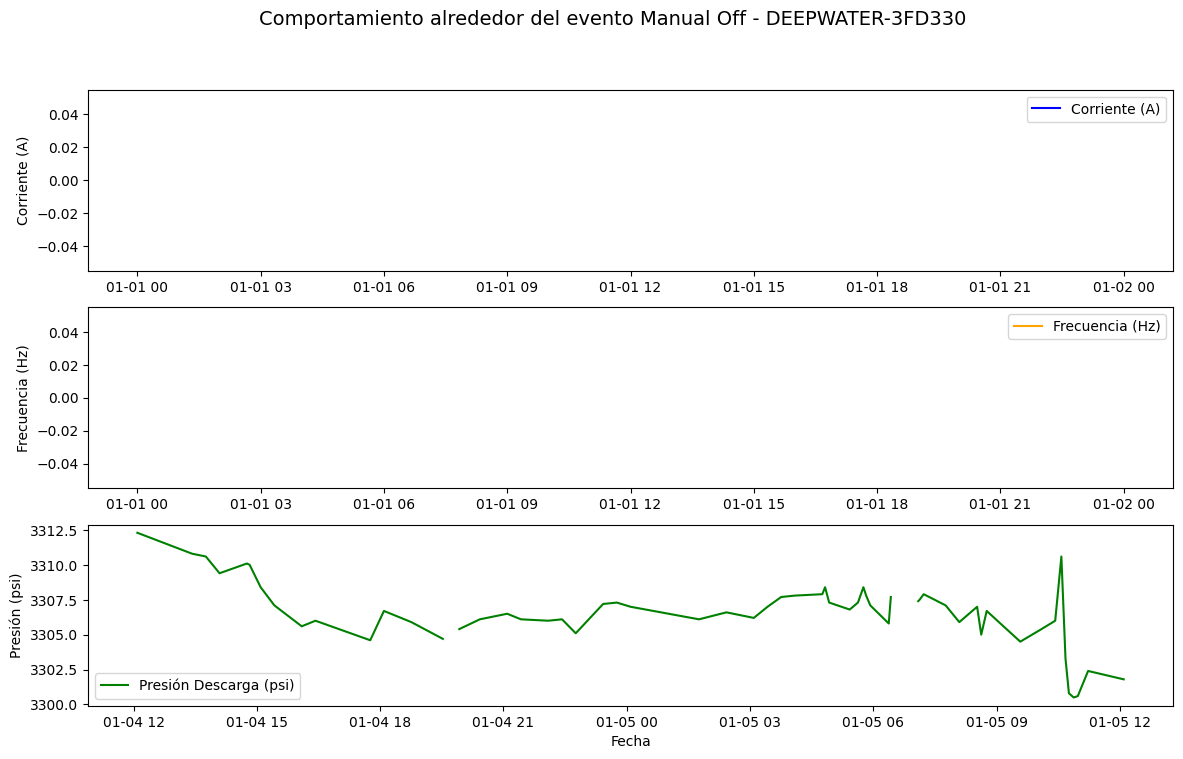

In [7]:
import matplotlib.pyplot as plt

# Pozo y fecha del evento
pozo = "DEEPWATER-3FD330"
fecha_evento = pd.to_datetime("2020-01-05 00:05:31")

# Filtrar datos +/- 12 horas alrededor del evento
mask = (
    (df["WELL_ID"] == pozo) &
    (df["DATE"] >= fecha_evento - pd.Timedelta(hours=12)) &
    (df["DATE"] <= fecha_evento + pd.Timedelta(hours=12))
)
df_event = df.loc[mask]

# Graficar variables clave
plt.figure(figsize=(14,8))

plt.subplot(3,1,1)
plt.plot(df_event["DATE"], df_event["CURRENT"], label="Corriente (A)", color="blue")
plt.ylabel("Corriente (A)")
plt.legend()

plt.subplot(3,1,2)
plt.plot(df_event["DATE"], df_event["FREQUENCY"], label="Frecuencia (Hz)", color="orange")
plt.ylabel("Frecuencia (Hz)")
plt.legend()

plt.subplot(3,1,3)
plt.plot(df_event["DATE"], df_event["PRESS_DESC"], label="Presión Descarga (psi)", color="green")
plt.ylabel("Presión (psi)")
plt.xlabel("Fecha")
plt.legend()

plt.suptitle(f"Comportamiento alrededor del evento Manual Off - {pozo}", fontsize=14)
plt.show()


C:\Users\Vìctor\AppData\Local\Temp\ipykernel_7768\143942515.py:35: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interp = df_event.interpolate(method="time")


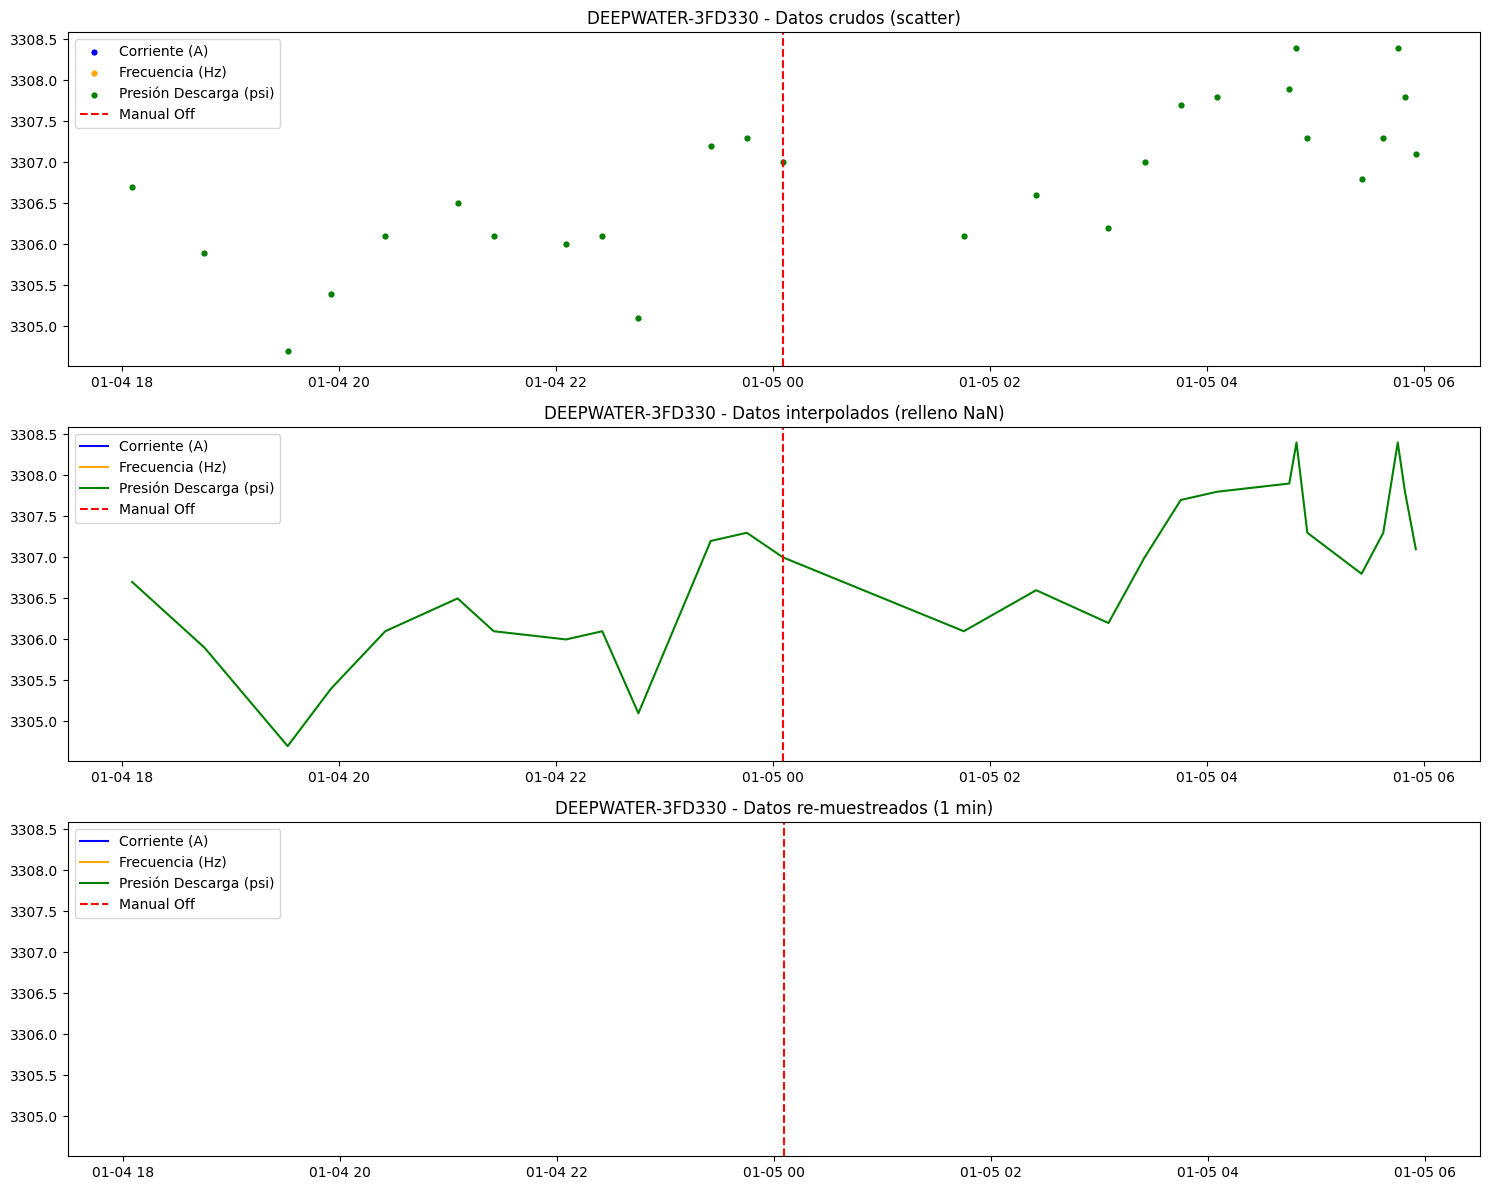

In [9]:
# =======================
# Función para graficar alrededor de un evento
# =======================
def plot_event(df, pozo, fecha_evento, horas=6):
    # Asegurar formato de fecha
    fecha_evento = pd.to_datetime(fecha_evento)

    # Filtrar datos +/- X horas alrededor del evento
    mask = (
        (df["WELL_ID"] == pozo) &
        (df["DATE"] >= fecha_evento - pd.Timedelta(hours=horas)) &
        (df["DATE"] <= fecha_evento + pd.Timedelta(hours=horas))
    )
    df_event = df.loc[mask].copy()

    # Asegurar índice de tiempo
    df_event = df_event.set_index("DATE").sort_index()

    plt.figure(figsize=(15,12))

    # =======================
    # 1. Scatter (datos crudos)
    # =======================
    plt.subplot(3,1,1)
    plt.scatter(df_event.index, df_event["CURRENT"], label="Corriente (A)", color="blue", s=12)
    plt.scatter(df_event.index, df_event["FREQUENCY"], label="Frecuencia (Hz)", color="orange", s=12)
    plt.scatter(df_event.index, df_event["PRESS_DESC"], label="Presión Descarga (psi)", color="green", s=12)
    plt.axvline(fecha_evento, color="red", linestyle="--", label="Manual Off")
    plt.title(f"{pozo} - Datos crudos (scatter)")
    plt.legend()

    # =======================
    # 2. Interpolados
    # =======================
    df_interp = df_event.interpolate(method="time")

    plt.subplot(3,1,2)
    plt.plot(df_interp.index, df_interp["CURRENT"], label="Corriente (A)", color="blue")
    plt.plot(df_interp.index, df_interp["FREQUENCY"], label="Frecuencia (Hz)", color="orange")
    plt.plot(df_interp.index, df_interp["PRESS_DESC"], label="Presión Descarga (psi)", color="green")
    plt.axvline(fecha_evento, color="red", linestyle="--", label="Manual Off")
    plt.title(f"{pozo} - Datos interpolados (relleno NaN)")
    plt.legend()

    # =======================
    # 3. Resampleados (cada 1 min, solo numéricas)
    # =======================
    df_resampled = df_event.select_dtypes(include=[np.number]).resample("1min").mean()

    plt.subplot(3,1,3)
    plt.plot(df_resampled.index, df_resampled["CURRENT"], label="Corriente (A)", color="blue")
    plt.plot(df_resampled.index, df_resampled["FREQUENCY"], label="Frecuencia (Hz)", color="orange")
    plt.plot(df_resampled.index, df_resampled["PRESS_DESC"], label="Presión Descarga (psi)", color="green")
    plt.axvline(fecha_evento, color="red", linestyle="--", label="Manual Off")
    plt.title(f"{pozo} - Datos re-muestreados (1 min)")
    plt.legend()

    plt.tight_layout()
    plt.show()


# =======================
# Ejemplo de uso con tu evento Manual Off
# =======================
plot_event(df, pozo="DEEPWATER-3FD330", fecha_evento="2020-01-05 00:05:31", horas=6)

In [10]:
# Número de pozos únicos
num_pozos = df["WELL_ID"].nunique()
print(f"🔎 Número total de pozos: {num_pozos}")

# Registros por pozo
registros_por_pozo = df["WELL_ID"].value_counts().reset_index()
registros_por_pozo.columns = ["WELL_ID", "Num_Registros"]

print("\n📊 Registros por pozo:")
print(registros_por_pozo.head(10))  # muestra los 10 con más registros

# Estadísticas de distribución
print("\n📈 Estadísticas de registros por pozo:")
print(registros_por_pozo["Num_Registros"].describe())


🔎 Número total de pozos: 75

📊 Registros por pozo:
            WELL_ID  Num_Registros
0  DEEPWATER-RDAYRK           7399
1  DEEPWATER-1AD32W           4958
2  DEEPWATER-DTL53P           4382
3  DEEPWATER-ROJ53V           4202
4  DEEPWATER-XASUQA           3697
5  DEEPWATER-GP0VTX           3675
6  DEEPWATER-UY0V1O           3167
7  DEEPWATER-PIK04Q           3071
8  DEEPWATER-55X0XE           3067
9  DEEPWATER-GIF2OB           2803

📈 Estadísticas de registros por pozo:
count      75.000000
mean     2307.680000
std       993.837446
min         1.000000
25%      2031.000000
50%      2226.000000
75%      2492.500000
max      7399.000000
Name: Num_Registros, dtype: float64


📊 % de valores nulos por pozo y variable:
            WELL_ID     CURRENT  PRESS_DESC   FREQUENCY   TEMP_MOT   VIBRATION
0  DEEPWATER-000XAR  100.000000    2.725648    0.089366   2.770331    4.021448
1  DEEPWATER-05YWY5  100.000000    0.758098  100.000000   0.275672  100.000000
2  DEEPWATER-0KPXEZ    0.000000    4.513064    0.000000   4.608076    4.798100
3  DEEPWATER-0SSSKO    0.182548    0.328587    0.182548   0.328587    0.328587
4  DEEPWATER-1AD32W    0.121017    7.139976    0.242033  20.915692   46.349334
5  DEEPWATER-1UBHZV    0.965406    5.470636    2.936444   6.999195   12.389381
6  DEEPWATER-1WHBG2    4.950495   10.586443    3.236862  12.376238   14.051790
7  DEEPWATER-2MK4DS  100.000000    0.084353  100.000000   2.066639    3.542809
8  DEEPWATER-34JETX    0.543478    3.532609    1.358696   3.532609    3.532609
9  DEEPWATER-3FD330  100.000000    1.368691  100.000000   6.928999   31.822070
📈 Ranking de pozos por calidad de datos:
             WELL_ID   CURRENT  PRESS_DESC  FREQ

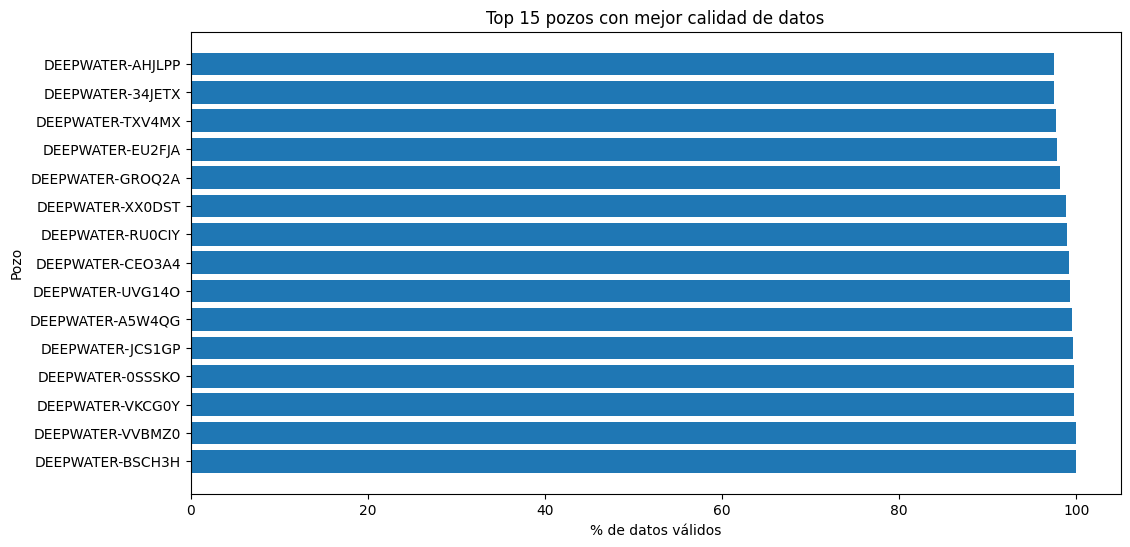

In [12]:
#Resumen por pozo
# Variables clave a analizar
variables_clave = ["CURRENT", "PRESS_DESC", "FREQUENCY", "TEMP_MOT", "VIBRATION"]

# Calcular % de nulos por pozo y variable
calidad_por_pozo = (
    df.groupby("WELL_ID")[variables_clave]
      .apply(lambda x: x.isna().mean() * 100)  # % de nulos
      .reset_index()
)

print("📊 % de valores nulos por pozo y variable:")
print(calidad_por_pozo.head(10))

# Promedio de % de nulos en las variables clave por pozo
calidad_por_pozo["Promedio_Nulos"] = calidad_por_pozo[variables_clave].mean(axis=1)

# Ordenar del pozo con menos nulos al de más nulos
calidad_por_pozo = calidad_por_pozo.sort_values("Promedio_Nulos")

print("📈 Ranking de pozos por calidad de datos:")
print(calidad_por_pozo.head(15))


plt.figure(figsize=(12,6))
plt.barh(
    calidad_por_pozo["WELL_ID"].head(15),
    100 - calidad_por_pozo["Promedio_Nulos"].head(15)  # % de datos válidos
)
plt.xlabel("% de datos válidos")
plt.ylabel("Pozo")
plt.title("Top 15 pozos con mejor calidad de datos")
plt.show()

